# Preparing the group sample

A good first step in a new analysis, checking the data of the sample and exploring what is available. In this case the sample is very sample and there is very little information available, so this will not be a long notebook. Here the sample information will be converted from an Excel file to a csv, examined, and the positions of the sources on the sky will be visualised.

The galaxy groups in this sample have been selected 

## Import statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from matplotlib import pyplot as plt

## Reading in the original sample file

This contains minimimal information, but enough to get started with an XMM analyis:
* **Group Name** - The unique identifiers for the galaxy groups
* **z** - An optical redshift for the system
* **RA** - Right ascension coordinate of estimated X-ray centre (likely in FK5)
* **Dec** - Declination coordinate of estimate X-ray centre (likely in FK5)

In [2]:
og_samp = pd.read_excel("../sample_files/OVI_XrayGroup_Centers.xlsx")
og_samp

,Group Name,z,RA,Dec
0,25124,0.186,243.629055,26.730240
1,44739,0.118,229.793620,28.331750
2,19670A,0.134,150.256710,50.793942
3,19670B,0.134,150.214920,50.805014
4,12833,0.145,129.496800,44.248700
5,44858,0.127,230.112000,28.887750
6,PHL1811,0.077,328.769920,-9.588805
7,50433,0.136,157.758000,30.862000


## Renaming columns and saving the csv version

Just changing some of the column headers to the style I tend to use, and more importantly saving the dataframe as a csv:

In [3]:
samp = og_samp.rename(columns={'Group Name': 'name', 'z': 'redshift', 'RA': 'est_ra', 'Dec': 'est_dec'})
samp = samp[['name', 'est_ra', 'est_dec', 'redshift']]
samp.to_csv("../sample_files/init_group_info.csv", index=False)
samp

,name,est_ra,est_dec,redshift
0,25124,243.629055,26.730240,0.186
1,44739,229.793620,28.331750,0.118
2,19670A,150.256710,50.793942,0.134
3,19670B,150.214920,50.805014,0.134
4,12833,129.496800,44.248700,0.145
5,44858,230.112000,28.887750,0.127
6,PHL1811,328.769920,-9.588805,0.077
7,50433,157.758000,30.862000,0.136


## Positions on the sky

There are so few sources that this is sort of pointless, but never mind. This simply shows the positions of the estimated X-ray centres on the sky. Please note that some of the groups are relatively close to one another:

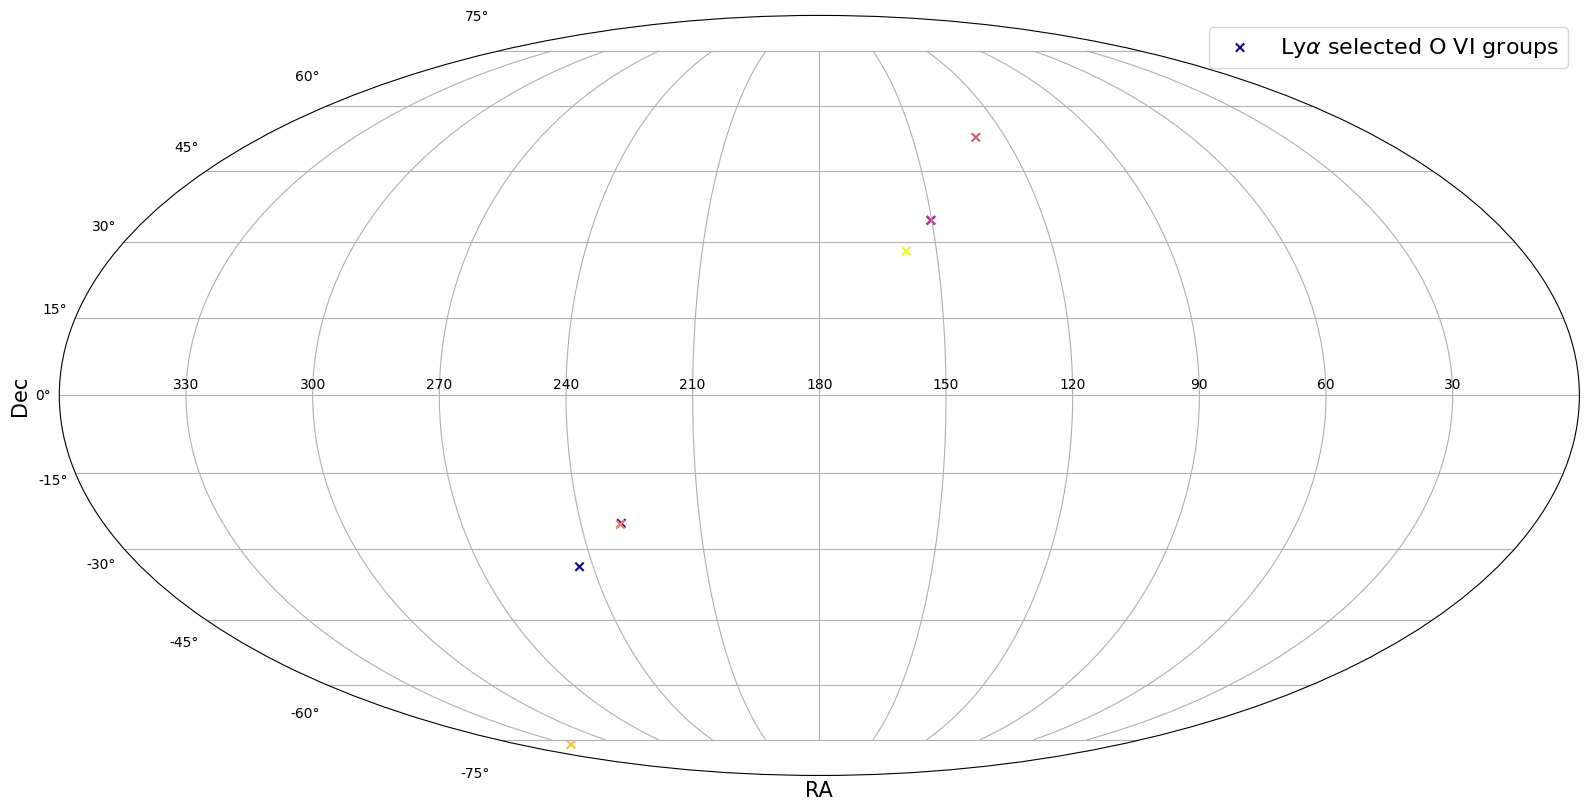

In [4]:
# Extract the RAs and Decs, shift them to the flipped x-axis astronomy 
#  convention, convert to radians
ra = Quantity(samp['est_ra'].values-180, 'deg')
ra = -ra
ra = ra.to('rad')
dec = Quantity(samp['est_ra'].values, 'deg').to('rad')

# Setting up the figure
fig = plt.figure(figsize=(16, 13))
# Adding a subplot specifically with the Mollweide projection
ax = fig.add_subplot(111, projection='mollweide' )
ax.scatter(ra, dec, marker='x', c=range(0, len(ra)), label=r"Ly$\alpha$ selected O VI groups", cmap='plasma')

# Set up a grid and custom hour labels for the RA axis
ax.grid(True)
ax.set_xticklabels(['330','300','270','240','210','180','150','120','90','60','30'])
# Create x and y axis labels
plt.xlabel('RA', fontsize=15)
plt.ylabel(r'Dec', fontsize=15)

plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../outputs/figures/group_loc.png')
plt.show()